# Loading packages and data

In [0]:
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

# Additional stopwords
tl_stop = pd.read_csv('stopwords-tl.txt', header = None)
tl_stop = tl_stop[0]
date_sw = set(['entertainmentnewshttps','news','final','word','tonight','full','story','breaking','news','ph','autofeed','utm_term','life','style','specials','nation','phnewshttps','2y2lwae','abs','cbn','inquirer','gma','newsinfo','p2fb','entertainment', '_robertvergarapic', 'robertverga','2019http','http','via','uaapseason81volleyballpic','utm_source','utm_medium','echobox','watch','net','likes','retweets','hello','two','los','two','days','banos','monday','tuesday','wednesday','thursday','friday','saturday','weeks','facebook','','love','cagayan','shangri', 'look','forward','new','york','la','medical','center','mas','malaki','united','states', 'de','oro','make','sure','san','juan','international','airport','goodbye','hellolovegoodbye','di','po','go','name','high','school','friday','night','n','questions','send','pag','uwi','eu','aec','ginoclock','lol','bit','bitly','nyo','yan','okay','ly','back','uae','ulan','wag','mo','ayaw','niyo','bigyan','akala','yung','','p','social','media','','sur','www','swarmapp','https','would','like','pic','twitter','another','one','wala','pang', 'instagram', 'ba', 'ngayong', 'araw', 'years','dulo','buhay','ago','rin','tatlong','araw','nga','nang','magkaroon','nakaraang','linggo','alas','hapon','umaga','naman','bahagi','daw','lang','every', 'day', 'said','yesterday','first','time','ayon', 'kay', 'year','old','last','year','file','photo','cebu','city','manila','philippines','metro','rapplerdotcom','tweet','us','rappler','si','com','highlights','check','live','blog','related','stories','visit','',' ',':','de','2019','january','february','march','april','may','june','july','august','september','october', 'november','december'])
sw = set(sw).union(set(tl_stop))
sw = set(sw).union(date_sw)

from wordcloud import WordCloud

import glob

import seaborn as sns

%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Gab
[nltk_data]     Daos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Merging all the scraped tweets into one file.

#df = pd.concat([pd.read_csv(f) for f in glob.glob('Data/Tweets/*.csv')], ignore_index = True)
#df = df[['date','username','text','likes','retweets']]
#df = df.dropna()
#df.to_csv('Data/Tweets/all_tweets.csv', index = False)

In [0]:
#Loading the datasets
df = pd.read_csv('Data/Tweets/all_tweets.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= '2019-01-01')]
df = df[~df['username'].isin(['abscbnsports','gmanews_sports'])].reset_index(drop = True)

# 1. Exploratory Data Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

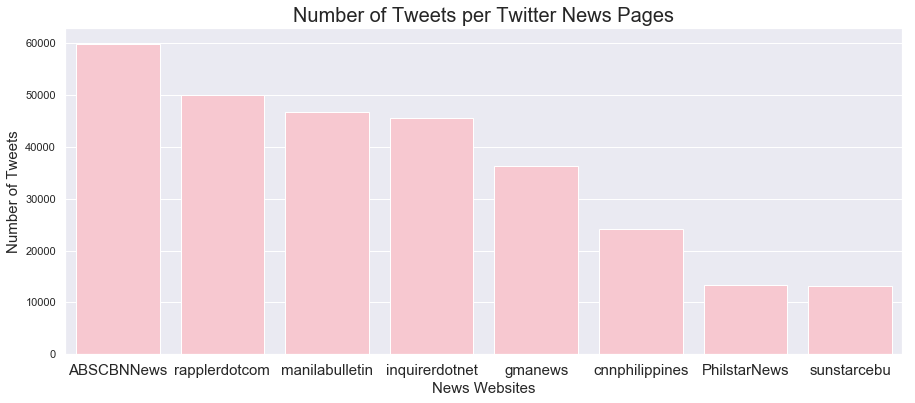

In [0]:
# Brief overview of tweets between news providers on twitter

plt.figure(figsize=(15,6))
plt.title('Number of Tweets per Twitter News Pages', fontsize = 20)
sns.barplot(data = df[df['username'] != 'ANCALERTS']['username'].value_counts().reset_index(), x = 'index' ,y =  'username', color = 'pink')
plt.ylabel('Number of Tweets', fontsize=15)
plt.xlabel('News Websites',fontsize=15)
plt.xticks(fontsize=15)

In [0]:
df.likes.describe()

count     42577.000000
mean        346.568828
std        1530.775487
min          51.000000
25%          70.000000
50%         109.000000
75%         232.000000
max      103759.000000
Name: likes, dtype: float64

In [0]:
# Filtering out tweets with no performance.

df = df[df['likes'] > 50].reset_index(drop = True)

In [0]:
#Overview of the top tweets

df.sort_values('likes', ascending = False)[['username','text','likes']]

,username,text,likes
3972,ABSCBNNews,LOOK: Jane de Leon is the new Darna. Olivia La...,72916
3349,ABSCBNNews,Narito ang sagot ni Bea Alonzo sa umano'y hiwa...,46638
11332,rapplerdotcom,WATCH: Sen Bato Dela Rosa's heated exchange wi...,37554
1969,ABSCBNNews,Farewell to one of Earth's most stalwart defen...,36979
5675,cnnphilippines,LOOK: Francisca Susano from Negros Occ. celebr...,33383
1012,ABSCBNNews,Kathryn Bernardo makes history with 2 movies e...,33145
3436,ABSCBNNews,Si Alex nga talaga ang best friend ni Bobbie.h...,31065
10845,rapplerdotcom,The actress instead directly donates to Bantay...,27850
2866,ABSCBNNews,Nakakadurog ng puso ang eksenang nakuhanan ni ...,27434
3725,ABSCBNNews,Manny Pacquiao stops Keith Thurman via split d...,26701


# 2. Data preparation for Regression via TFIDF

##### df['username'].value_counts()

In [0]:
# Adding the news tweet provider among the words to be vectorized in TFIDF

docs = df['username'] + ' ' +  df['text']
#docs = df['text']

In [0]:
#Fitting the word corpus into a TFIDF vector format.

tfidf = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',ngram_range = (2,3),min_df = 5,max_features = 1000,stop_words = sw ,lowercase=True)
text = tfidf.fit_transform(docs)
X = text.toarray()

## TFIDF Vector EDA

In [0]:
# Review of the features generated by the TFIDF Vectorizer

tfidf.get_feature_names()

['18th congress',
 '18th congress cnn',
 'abscbnball2019 alecs',
 'abscbnball2019 alecs ongcalpic',
 'abscbnball2019 cedrickkbascopic',
 'abscbnball2019 red',
 'abscbnball2019 red carpet',
 'abscbnball2019 reymadevezapic',
 'abscbnball2019 rob',
 'abscbnball2019 rob reyespic',
 'abscbnball2019 shiereyespic',
 'abscbnball2019 tristannodalopic',
 'abscbnnews status',
 'academic freedom',
 'adha feast',
 'adha feast sacrifice',
 'african swine',
 'afternoon classes',
 'afternoon classes due',
 'afternoon classes levels',
 'aga muhlach',
 'agosto inaasahang',
 'agosto inaasahang masamang',
 'alan peter',
 'alan peter cayetano',
 'alden richards',
 'alden richards aldenrichards02',
 'alecs ongcalpic',
 'alert tropical',
 'alert tropical depression',
 'alert tropical storm',
 'allan gomez',
 'allowance law',
 'along commonwealth',
 'amal clooney',
 'amazon fires',
 'andi eigenmann',
 'andrea brillantes',
 'andres bonifacio',
 'andres bonifacio monument',
 'angat dam',
 'angel locsin',
 'ange

In [0]:
# Transforming TFIDF vector into a data frame with Feature Names as columns.

to_cluster = pd.DataFrame(X, columns = tfidf.get_feature_names())

In [0]:
# Identifying which n-gram has the most number of likes by grouping them.


top_topics = to_cluster.melt().groupby('variable').sum().sort_values(by = 'value',ascending = False).reset_index()

topics_likes = pd.DataFrame(columns = ['topic','likes'])

for topics in top_topics['variable']:
    topics_likes = topics_likes.append(pd.DataFrame([[topics,df[df['text'].str.lower().str.contains(topics)]['likes'].sum()]], columns =topics_likes.columns))


In [0]:
# Top n-grams by likes

topics_likes.sort_values(by = 'likes', ascending = False).head(20).reset_index(drop = True)

,topic,likes
0,kathryn bernardo,191572
1,isko moreno,124995
2,bea alonzo,113151
3,mayor isko,112101
4,red carpet,111711
5,mayor isko moreno,98891
6,alden richards,97915
7,gina lopez,86143
8,nadine lustre,85573
9,dela rosa,84303


## Word Cloud for EDA

In [0]:
to_cluster['date'] = df['date']
to_cluster['likes'] = df['likes']
to_cluster['retweets'] = df['retweets']

In [0]:
tweets = to_cluster[to_cluster['date'].dt.month==9].melt()

In [0]:
dicts = tweets[tweets['variable'] != 'date'].groupby('variable').sum().reset_index()

In [0]:
dicts = dict(zip(dicts.variable, dicts.value))

In [0]:
tweets = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-01-31')].text.values

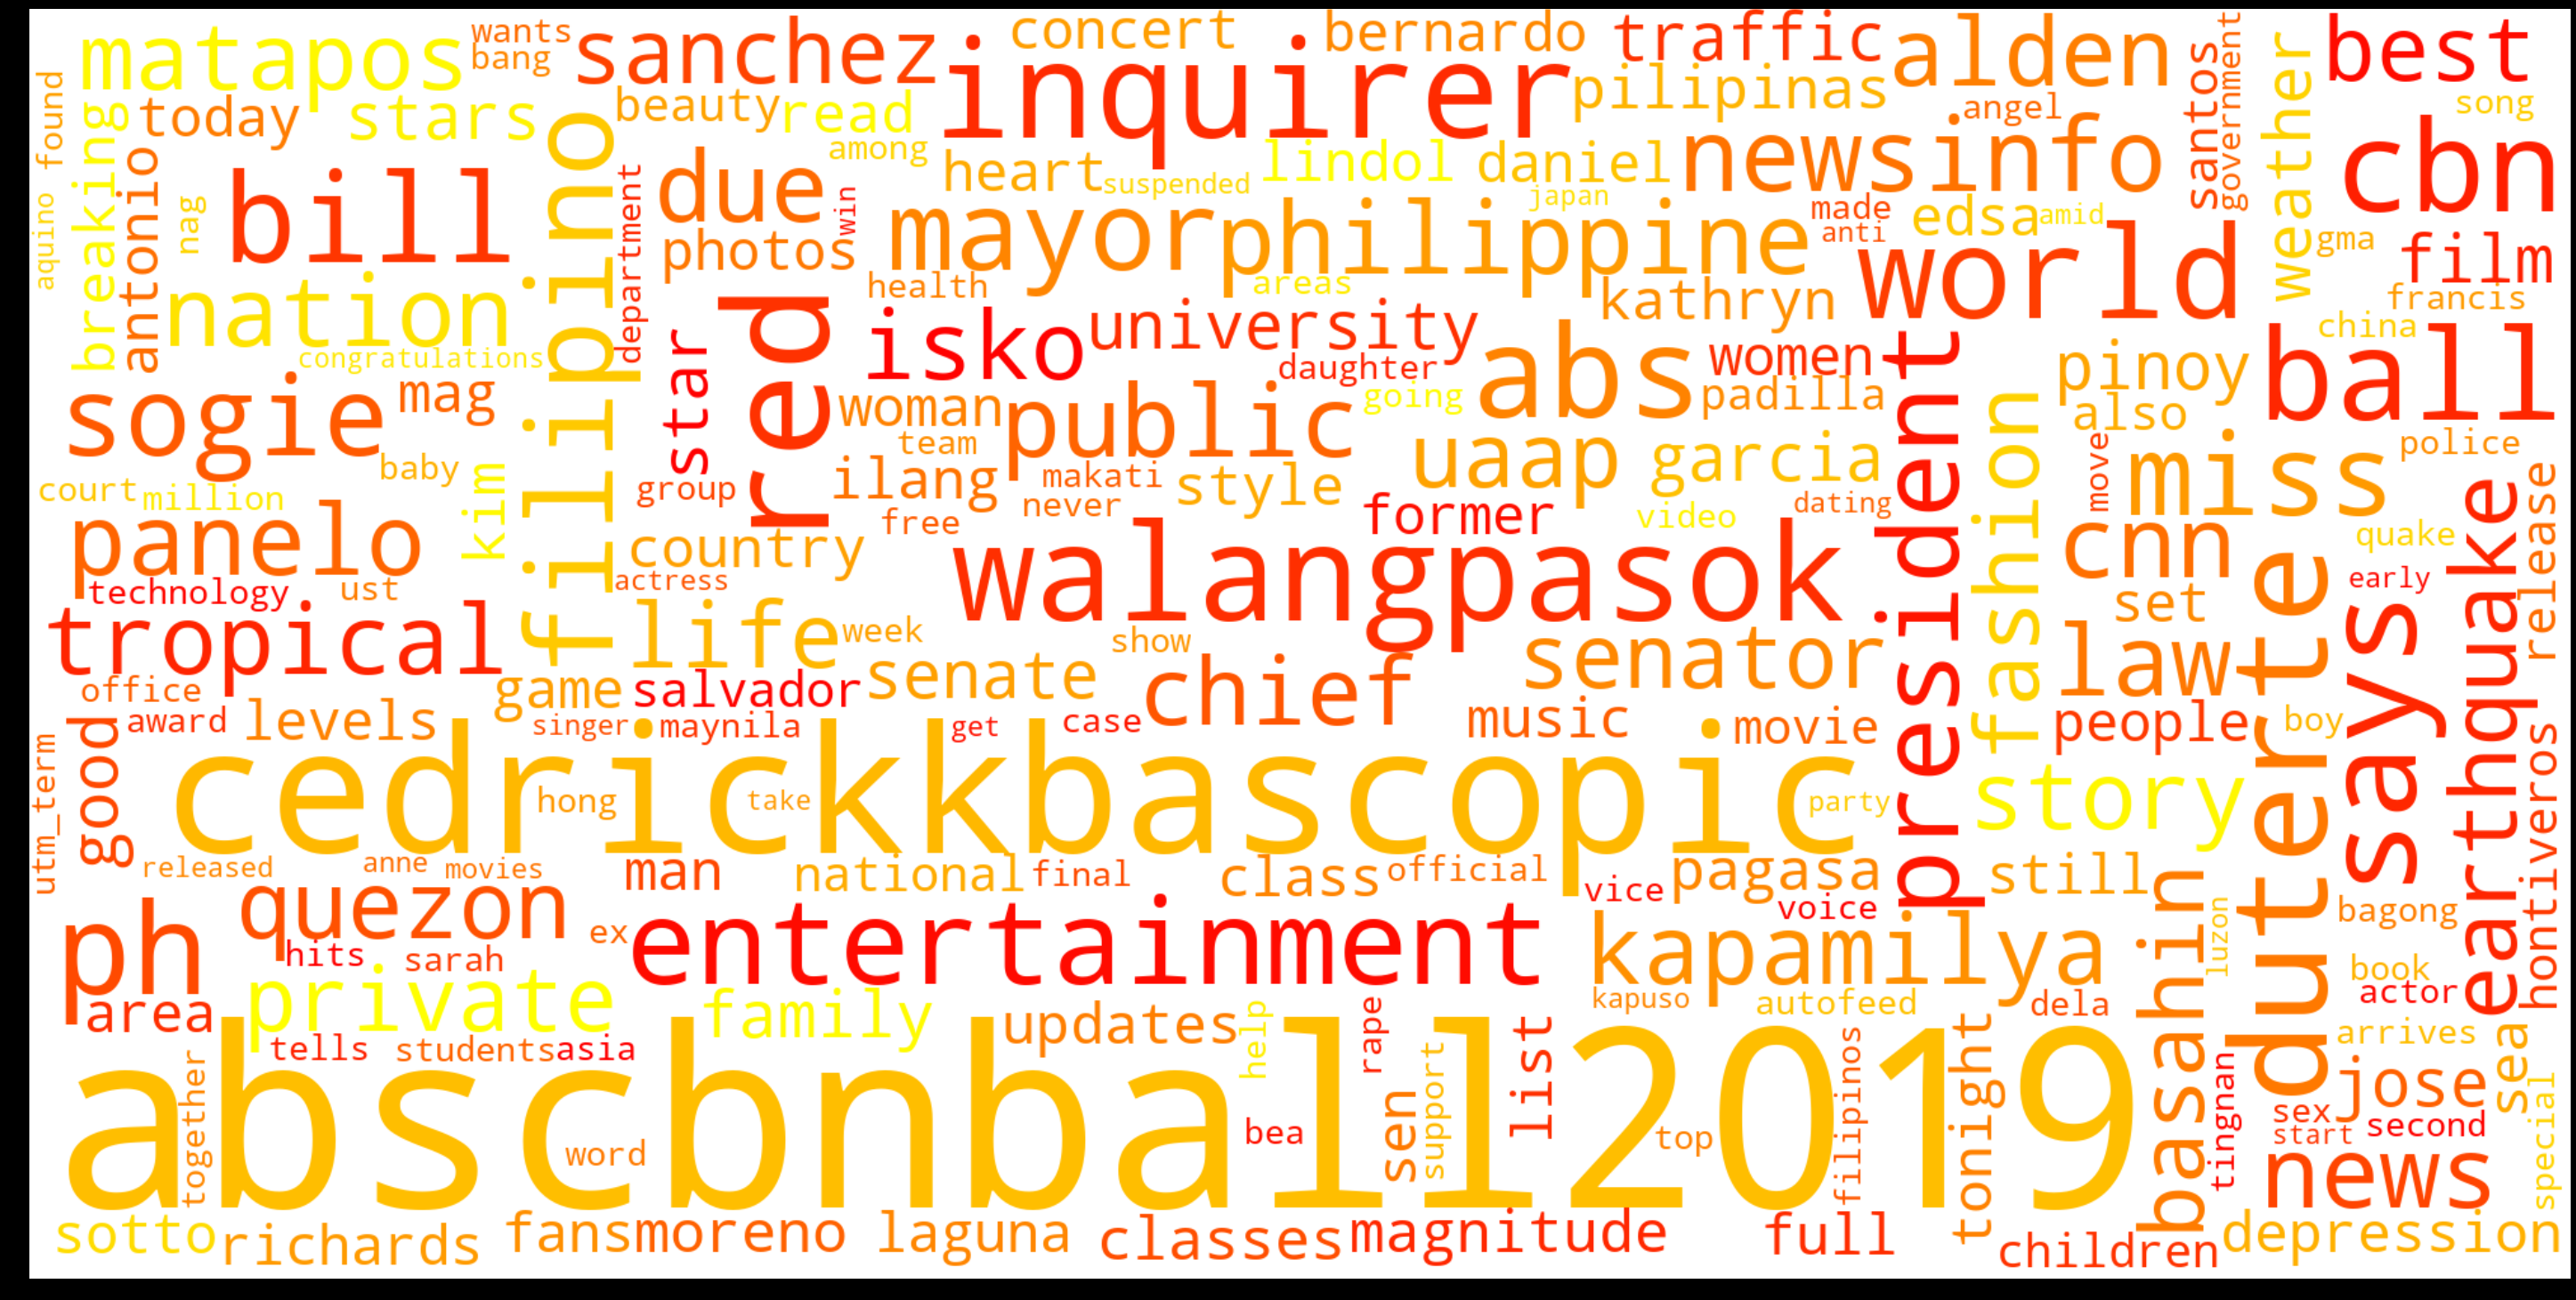

In [0]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'white', colormap="autumn",
    stopwords = sw).generate_from_frequencies(dicts)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 3. Predictive Modeling 

In [0]:
#Loading the datasets for the last 3 months (Due to machine capabilities, that's only as far as it can manage for accurate predictions)

df = pd.read_csv('Data/Tweets/all_tweets.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= '2019-07-01')]
df = df[~df['username'].isin(['abscbnsports','gmanews_sports'])].reset_index(drop = True)

df = df[df['likes'] > 50].reset_index(drop = True)

docs = df['username'] + ' ' +  df['text']

In [0]:
# Ideal vectorizer settings for the most accurate predictions

#tfidf = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',ngram_range = (2,3),max_features = 65000,stop_words = sw ,lowercase=True)
tfidf = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',ngram_range = (2,3),max_features = 135000,stop_words = sw ,lowercase=True)
text = tfidf.fit_transform(docs)
X = text.toarray()

In [0]:
# Converting vectors into a dataframe for regression modeling.

vec = pd.DataFrame(X, columns = tfidf.get_feature_names())

In [0]:
# Assigning X, Y, and Z target values for regression

X = vec
Y = df['likes'].reset_index(drop = True)
Z = df['retweets'].reset_index(drop = True)

In [0]:
# Splitting the dataset for training and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Z, test_size=0.30, random_state=42)

In [0]:
# Fitting the two variables in the Ridge Regression model.

from sklearn.linear_model import Ridge      
logmodel = Ridge()
logmodel.fit(X,Z)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
# Prediction testing
# Format: <News Source Name> <Tweet Content>

test = tfidf.transform({'rapplerdotcom Actor Enchong Dee calls out Metro Manila Development Authority spokesperson Celine Pialago Tuesday, October 1, for her statement and sentiments on the September 30 transport strike'})
x_test = test.toarray()
x_test = pd.DataFrame(x_test, columns = tfidf.get_feature_names())

predictions = model.predict(x_test)
predictions

array([307.89818419])

In [0]:
# The score of the prediction model.

logmodel.score(X_test,y_test) * 100

70.7510556868328

In [0]:
#Saving the model for easy loading for next tests.

from sklearn.externals import joblib
#filename = 'finalized_model.sav'
#joblib.dump(logmodel, filename)

In [0]:
# Loading the model.

model = joblib.load('finalized_model.sav')

In [0]:
x_test = df[(df['date'] >= '2019-09-01')]
x_test = df[~df['username'].isin(['abscbnsports','gmanews_sports'])].reset_index(drop = True)
x_test = x_test[x_test['likes'] > 50].reset_index(drop = True)
x_test = tfidf.transform(x_test['username'] + ' ' +  x_test['text'])
x_test = x_test.toarray()
y_test = df['likes'].reset_index(drop = True)
z_test = df['retweets'].reset_index(drop = True)

predictions = logmodel.predict(x_test)
predictions

In [0]:
model.score(x_test,y_test)

NameError: name 'x_test' is not defined

In [0]:
x_test = df[(df['date'] >= '2019-09-01')]
x_test = df[~df['username'].isin(['abscbnsports','gmanews_sports'])].reset_index(drop = True)
x_test['predictions'] = predictions
x_test

,date,username,text,likes,retweets,predictions
0,2019-08-31 23:46:27+00:00,ABSCBNNews,LPA off Cagayan now tropical depression #Kabay...,66,13,-28.358504
1,2019-08-31 23:24:47+00:00,ABSCBNNews,"The low pressure area spotted west of Calayan,...",142,37,-724.526148
2,2019-08-31 23:10:00+00:00,ABSCBNNews,Malacañang: Gilas deserves admiration for show...,100,4,-457.340655
3,2019-08-31 23:07:44+00:00,ABSCBNNews,"Grupo ng mga siklista, naghahanda na sa Bonifa...",86,12,208.987774
4,2019-08-31 23:00:00+00:00,ABSCBNNews,“Pagalingin mo ang mga maysakit at buhayin mo ...,163,54,664.452352
5,2019-08-31 22:56:01+00:00,ABSCBNNews,"LOOK: Participants of the ""Walk for Creation"" ...",52,6,-367.660874
6,2019-08-31 22:32:56+00:00,ABSCBNNews,Hiwalay na nga ba sina Ellen Adarna at John Ll...,59,0,-140.094502
7,2019-08-31 22:17:10+00:00,ABSCBNNews,"Thousands of Catholics expected to join a ""wal...",151,18,451.458073
8,2019-08-31 20:00:00+00:00,ABSCBNNews,"‘The Voice Kids 4’: Boy, 12, wows with whistle...",55,4,1552.837472
9,2019-08-31 16:23:07+00:00,ABSCBNNews,First alarm sa Marikina River idineklarahttps:...,83,15,587.732890
